In [1]:
#Projeto Entradas e Saidas no Estoque - Analise e Predicoes
######ENTRADA#######
######SAIDA#######

In [11]:
!pip install pandas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [14]:
# Carregar a tabela de entrada
caminho_tabela_entrada = '/content/drive/MyDrive/Pos_IFAM_Aprendizagem de Maquina/TCC/EntradasEstoque.csv'

In [15]:
# Careegar a tabela de saída
caminho_tabela_saida = '/content/drive/MyDrive/Pos_IFAM_Aprendizagem de Maquina/TCC/SaidasEstoque.csv'

In [16]:
# Carregar as tabelas em DataFrames do Pandas
tabela_entrada = pd.read_csv(caminho_tabela_entrada, encoding='ISO-8859-1',sep=';')

In [17]:
# Carregar as tabelas em DataFrames do Pandas
tabela_saida = pd.read_csv(caminho_tabela_saida, encoding='ISO-8859-1',sep=';')

In [18]:
print('Dados da tabela de ENTRADA')
df_limpoentra = tabela_entrada.dropna()  #Limpando valores nulos da tabela
print(df_limpoentra)
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')

Dados da tabela de ENTRADA
        Item     DATAMOV  NROMOV DESTINO TIPOGIRO  PRODUTO     QUANT  \
194      195  04/10/2010       1   AA001        C   1890.0        50   
195      196  04/10/2010       2   AA001        C   1820.0   1004090   
196      197  04/10/2010       2   AA001        C   1648.0  29258090   
197      198  04/10/2010      18   AA030        C    644.0        39   
198      199  04/10/2010      20   AA103        C   1973.0        27   
...      ...         ...     ...     ...      ...      ...       ...   
18763  18764  25/10/2021       6   AA001        C   3739.0       400   
18764  18765  25/10/2021       9   AA001        C   3775.0   1344500   
18765  18766  26/10/2021      14   AA001        C   3775.0   2024560   
18766  18767  12/03/2022       1   AA001        C   3794.0    350000   
18767  18768  24/05/2022       1   AA001        C    443.0      1800   

          NROLOTE  DATAFABRIC    DATAVENC  
194             A  18/08/2010  18/08/2014  
195             A  0

In [21]:
#Tabela de saida do estoque
print('Dados da tabela de SAÍDA')
print(tabela_saida)

Dados da tabela de SAÍDA
        Item     DATAMOV  NROMOV TIPOGIRO ORIGEM  PRODUTO  QUANT  DATAENTRA  \
0          1  04/10/2010       3        C  AA017      306     10        NaN   
1          2  04/10/2010       3        C  AA018      327  10000        NaN   
2          3  04/10/2010       3        C  AA019      331  25000        NaN   
3          4  04/10/2010       3        C  AA021      341  10000        NaN   
4          5  04/10/2010       3        C  AA028      578  10000        NaN   
...      ...         ...     ...      ...    ...      ...    ...        ...   
18763  18764  23/02/2011      17        C  AA112     2050      2        NaN   
18764  18765  23/02/2011      17        C  AA115     2066      2        NaN   
18765  18766  23/02/2011      17        C  AA117     2100      2        NaN   
18766  18767  23/02/2011      17        C  AA124     2126      3        NaN   
18767  18768  23/02/2011      17        C  AA124     2126      3        NaN   

      NROLOTE  DATAFABRIC 

In [22]:
# Calcular a diferença entre as colunas QUANT das duas tabelas
diferenca_quant = tabela_saida['QUANT'].sum() - tabela_entrada['QUANT'].sum()

In [23]:
print("Diferença entre a soma das colunas QUANT da tabela de saída e entrada:", diferenca_quant)

Diferença entre a soma das colunas QUANT da tabela de saída e entrada: -7464210586


In [24]:
# Plotar as colunas QUANT das duas tabelas
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

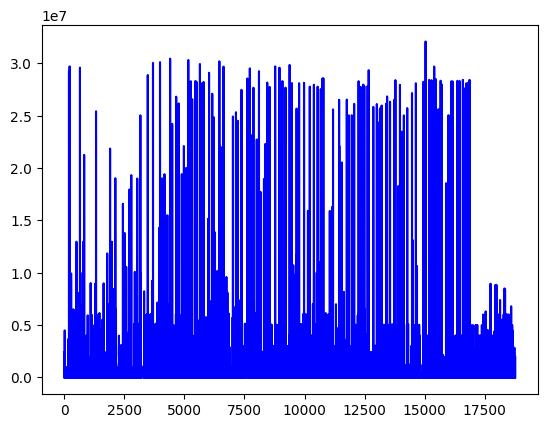

In [25]:
# Plotar a coluna QUANT da tabela de entrada
plt.plot(tabela_entrada['QUANT'], label='Tabela de Entrada', color='blue')

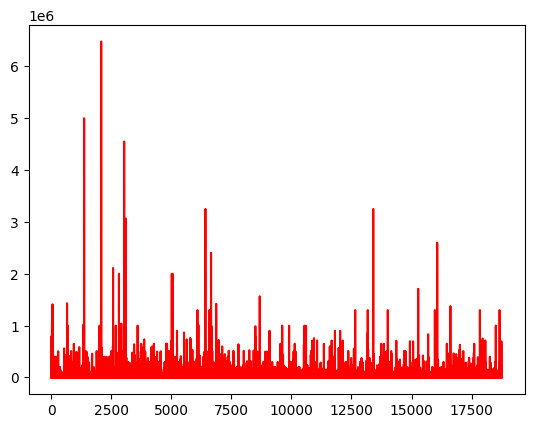

In [26]:
# Plotar a coluna QUANT da tabela de saída
plt.plot(tabela_saida['QUANT'], label='Tabela de Saída', color='red')

In [27]:
# Calcular a média das colunas QUANT das duas tabelas
media_entrada = tabela_entrada['QUANT'].mean()
media_saida = tabela_saida['QUANT'].mean()

In [28]:
# Preparar os dados para o gráfico de pizza
medias = [media_entrada, media_saida]
labels = ['Entrada', 'Saída']

Text(0.5, 1.0, 'Média de Quantidade (Entrada vs. Saída)')

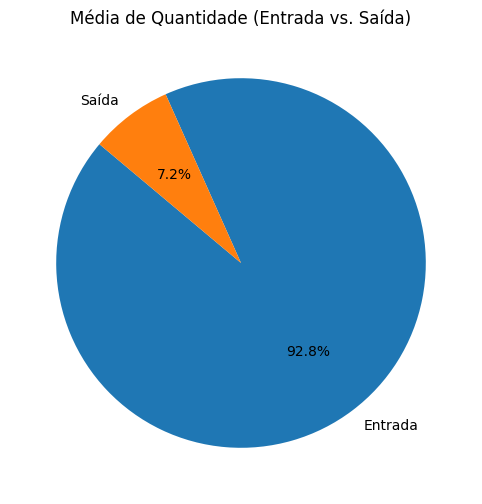

In [29]:
# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(medias, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Média de Quantidade (Entrada vs. Saída)')

In [30]:
#------------------------------------------------------------------
# Treino dos Dados, usando as dias colunas em comun nas duas tabelas

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [32]:
# Preparar os dados
dados_entrada = tabela_entrada['QUANT']
dados_saida = tabela_saida['QUANT']
X = dados_entrada.values.reshape(-1, 1)  # Dados de entrada
y = dados_saida.values  # Rótulos (saída)

In [33]:
# Garantir que os mesmo numero de amostras estejam iguais nas duas tabelas: a de entrada e de saída;
# Visualizar o número de amostras em cada tabela
## Percebido a diferença entre o numero de amostras, inputs, entradas e saidas, vamos ajustar!!
print("Número de amostras em tabela_entrada:", len(tabela_entrada))
print("Número de amostras em tabela_saida:", len(tabela_saida))

Número de amostras em tabela_entrada: 18768
Número de amostras em tabela_saida: 18768


In [34]:
# Ajustar a tabela de entrada para ter o mesmo número de amostras que a
#tabela de saída, cortando as linhas excedentes.
if len(tabela_entrada) > len(tabela_saida):
    tabela_entrada = tabela_entrada.iloc[:len(tabela_saida)]
elif len(tabela_entrada) < len(tabela_saida):
    tabela_saida = tabela_saida.iloc[:len(tabela_entrada)]

In [35]:
# Verificar se as dimensões estão corretas
print("Número de amostras em tabela_entrada após o alinhamento:", len(tabela_entrada))
print("Número de amostras em tabela_saida após o alinhamento:", len(tabela_saida))

Número de amostras em tabela_entrada após o alinhamento: 18768
Número de amostras em tabela_saida após o alinhamento: 18768


In [36]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Construir o modelo
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

In [38]:
# Compilar o modelo   #mean_squared_error e otimizador Adam
model.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
# Treinar o modelo  # 50 epocas
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
1502/1502 [==============================] - 8s 3ms/step - loss: 399460335616.0000
Epoch 2/50
1502/1502 [==============================] - 4s 3ms/step - loss: 17023025152.0000
Epoch 3/50
1502/1502 [==============================] - 4s 3ms/step - loss: 15868896256.0000
Epoch 4/50
1502/1502 [==============================] - 6s 4ms/step - loss: 15868850176.0000
Epoch 5/50
1502/1502 [==============================] - 4s 3ms/step - loss: 15868779520.0000
Epoch 6/50
1502/1502 [==============================] - 4s 3ms/step - loss: 15868723200.0000
Epoch 7/50
1502/1502 [==============================] - 5s 3ms/step - loss: 15868659712.0000
Epoch 8/50
1502/1502 [==============================] - 4s 3ms/step - loss: 15868601344.0000
Epoch 9/50
1502/1502 [==============================] - 5s 3ms/step - loss: 15868510208.0000
Epoch 10/50
1502/1502 [==============================] - 6s 4ms/step - loss: 15868455936.0000
Epoch 11/50
1502/1502 [==============================] - 5s 4ms/step

In [42]:
# Compilar o modelo   #mean_squared_error e otimizador Adam
model.compile(loss='mean_squared_error', optimizer='adadelta')

In [43]:
# Treinar o modelo  # 100 epocas
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
1502/1502 [==============================] - 5s 3ms/step - loss: 15865846784.0000
Epoch 2/100
1502/1502 [==============================] - 4s 3ms/step - loss: 15865847808.0000
Epoch 3/100
1502/1502 [==============================] - 5s 3ms/step - loss: 15865848832.0000
Epoch 4/100
1502/1502 [==============================] - 4s 3ms/step - loss: 15865849856.0000
Epoch 5/100
1502/1502 [==============================] - 4s 3ms/step - loss: 15865850880.0000
Epoch 6/100
1502/1502 [==============================] - 5s 3ms/step - loss: 15865854976.0000
Epoch 7/100
1502/1502 [==============================] - 4s 3ms/step - loss: 15865858048.0000
Epoch 8/100
1502/1502 [==============================] - 4s 3ms/step - loss: 15865856000.0000
Epoch 9/100
1502/1502 [==============================] - 5s 3ms/step - loss: 15865837568.0000
Epoch 10/100
1502/1502 [==============================] - 4s 3ms/step - loss: 15865846784.0000
Epoch 11/100
1502/1502 [==============================] - 4

In [44]:
# Avaliar o modelo
score = model.evaluate(X_test, y_test, verbose=1)
print('Erro médio quadrático:', score)

118/118 [==============================] - 0s 2ms/step - loss: 20799395840.0000
Erro médio quadrático: 20799395840.0


In [45]:
# Fazer previsões
previsoes = model.predict(X_test)

118/118 [==============================] - 0s 1ms/step


In [46]:
# Calcular a diferença entre as colunas QUANT da tabela de entrada e de saída
diferenca_estoque_real = tabela_entrada['QUANT'].sum() - tabela_saida['QUANT'].sum()
print('Diferença entre as quantidades da entrada e saida no estoque,',diferenca_estoque_real)

Diferença entre as quantidades da entrada e saida no estoque, 7464210586


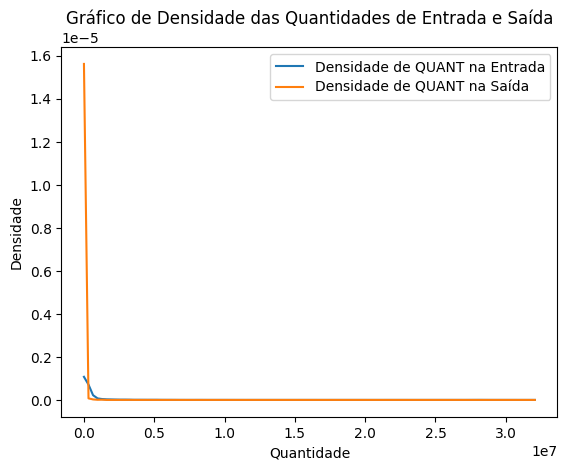

Diferença entre as quantidades da entrada e saída no estoque: 7464210586


In [50]:
from sklearn.metrics import accuracy_score
from scipy.stats import gaussian_kde

# Calculando a diferença entre as quantidades da entrada e saída
diferenca_estoque_real = tabela_entrada['QUANT'].sum() - tabela_saida['QUANT'].sum()

# Plotando a densidade das quantidades
densidade_entrada = gaussian_kde(tabela_entrada['QUANT'])
densidade_saida = gaussian_kde(tabela_saida['QUANT'])
x_vals = np.linspace(min(tabela_entrada['QUANT'].min(), tabela_saida['QUANT'].min()),
                     max(tabela_entrada['QUANT'].max(), tabela_saida['QUANT'].max()),
                     100)

plt.plot(x_vals, densidade_entrada(x_vals), label='Densidade de QUANT na Entrada')
plt.plot(x_vals, densidade_saida(x_vals), label='Densidade de QUANT na Saída')
plt.xlabel('Quantidade')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade das Quantidades de Entrada e Saída')
plt.legend()
plt.show()

# Calculando a acurácia (se aplicável)
# Aqui você deve substituir previsões e rótulos_verdadeiros com seus próprios dados
# Se não estiver trabalhando com classificação, você pode ignorar esta parte
# previsoes = ...
# rótulos_verdadeiros = ...
# acuracia = accuracy_score(rótulos_verdadeiros, previsoes)

# Exibindo a diferença entre as quantidades e a acurácia
print('Diferença entre as quantidades da entrada e saída no estoque:', diferenca_estoque_real)
# print('Acurácia do modelo:', acuracia)  # Descomente esta linha se tiver dados de acurácia


In [47]:
print('FIM ')

FIM 
